In [45]:
import sqlite3
import time
import pymongo
import numpy as np
import json
import requests
import pandas as pd
import datetime
from PIL import Image
from IPython.display import HTML
from matplotlib.image import imread
from pandasql import sqldf
import matplotlib.pyplot as plt
import dark_sky_api_remy
%matplotlib inline

In [46]:
import pytz
from dateutil.parser import parse
from dateutil import tz
dates = [datetime.date(parse('2011,7,15')) + datetime.timedelta(i) for i in range(297)]

ValueError: ('Unknown string format:', '2011,7,15')

In [9]:
def inital(season_start_date, season_end_date):
    start_date = parse(season_start_date)
    end_date = parse(season_start_date)
    date_range = (end_date - start_date).days
    dates = [str(start_date + datetime.timedelta(i)) for i in range(date_range)]
    return dates

In [42]:
start_date = parse('2011/12/12')
end_date = parse('2012/12/12')
rang = (end_date-start_date).days
# dates = []
# for i in range(rang):
#     dates.append(str(start_date + datetime.timedelta(i)))
dates1 = [str(start_date + datetime.timedelta(i)).split()[0] for i in range(rang)]
dates1

['2011-12-12',
 '2011-12-13',
 '2011-12-14',
 '2011-12-15',
 '2011-12-16',
 '2011-12-17',
 '2011-12-18',
 '2011-12-19',
 '2011-12-20',
 '2011-12-21',
 '2011-12-22',
 '2011-12-23',
 '2011-12-24',
 '2011-12-25',
 '2011-12-26',
 '2011-12-27',
 '2011-12-28',
 '2011-12-29',
 '2011-12-30',
 '2011-12-31',
 '2012-01-01',
 '2012-01-02',
 '2012-01-03',
 '2012-01-04',
 '2012-01-05',
 '2012-01-06',
 '2012-01-07',
 '2012-01-08',
 '2012-01-09',
 '2012-01-10',
 '2012-01-11',
 '2012-01-12',
 '2012-01-13',
 '2012-01-14',
 '2012-01-15',
 '2012-01-16',
 '2012-01-17',
 '2012-01-18',
 '2012-01-19',
 '2012-01-20',
 '2012-01-21',
 '2012-01-22',
 '2012-01-23',
 '2012-01-24',
 '2012-01-25',
 '2012-01-26',
 '2012-01-27',
 '2012-01-28',
 '2012-01-29',
 '2012-01-30',
 '2012-01-31',
 '2012-02-01',
 '2012-02-02',
 '2012-02-03',
 '2012-02-04',
 '2012-02-05',
 '2012-02-06',
 '2012-02-07',
 '2012-02-08',
 '2012-02-09',
 '2012-02-10',
 '2012-02-11',
 '2012-02-12',
 '2012-02-13',
 '2012-02-14',
 '2012-02-15',
 '2012-02-

In [41]:
dates = []
for i in range(rang):
    dates.append(str(start_date + datetime.timedelta(i)).split()[0])
dates

['2011-12-12',
 '2011-12-13',
 '2011-12-14',
 '2011-12-15',
 '2011-12-16',
 '2011-12-17',
 '2011-12-18',
 '2011-12-19',
 '2011-12-20',
 '2011-12-21',
 '2011-12-22',
 '2011-12-23',
 '2011-12-24',
 '2011-12-25',
 '2011-12-26',
 '2011-12-27',
 '2011-12-28',
 '2011-12-29',
 '2011-12-30',
 '2011-12-31',
 '2012-01-01',
 '2012-01-02',
 '2012-01-03',
 '2012-01-04',
 '2012-01-05',
 '2012-01-06',
 '2012-01-07',
 '2012-01-08',
 '2012-01-09',
 '2012-01-10',
 '2012-01-11',
 '2012-01-12',
 '2012-01-13',
 '2012-01-14',
 '2012-01-15',
 '2012-01-16',
 '2012-01-17',
 '2012-01-18',
 '2012-01-19',
 '2012-01-20',
 '2012-01-21',
 '2012-01-22',
 '2012-01-23',
 '2012-01-24',
 '2012-01-25',
 '2012-01-26',
 '2012-01-27',
 '2012-01-28',
 '2012-01-29',
 '2012-01-30',
 '2012-01-31',
 '2012-02-01',
 '2012-02-02',
 '2012-02-03',
 '2012-02-04',
 '2012-02-05',
 '2012-02-06',
 '2012-02-07',
 '2012-02-08',
 '2012-02-09',
 '2012-02-10',
 '2012-02-11',
 '2012-02-12',
 '2012-02-13',
 '2012-02-14',
 '2012-02-15',
 '2012-02-

In [49]:
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

In [50]:
c.execute("""SELECT *
             FROM Matches
             WHERE Season IN (2011) AND Div IN ('D1','D2') 
             ORDER BY Date
             """)

df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1133,D2,2011,2011-07-15,Cottbus,Dresden,2,1,H
1,1167,D2,2011,2011-07-15,Greuther Furth,Ein Frankfurt,2,3,A
2,1551,D2,2011,2011-07-15,Frankfurt FSV,Union Berlin,1,1,D
3,1550,D2,2011,2011-07-16,Erzgebirge Aue,Aachen,1,0,H
4,1678,D2,2011,2011-07-16,St Pauli,Ingolstadt,2,0,H


In [81]:
teams = pd.DataFrame()
teams['GoalsScored'] = df.groupby('HomeTeam').FTHG.sum()+df.groupby('AwayTeam').FTAG.sum()
df['HomeWin'] = df.FTR.map({'H':1, 'A':0, 'D':0})
df['AwayWin'] = df.FTR.map({'H':0, 'A':1, 'D':0})
df['HomeLoss'] = df.FTR.map({'H':0, 'A':1, 'D':0})
df['AwayLoss'] = df.FTR.map({'H':1, 'A':0, 'D':0})
teams['Wins'] = df.groupby('HomeTeam').HomeWin.sum() + df.groupby('AwayTeam').AwayWin.sum()
teams['Losses'] = df.groupby('HomeTeam').HomeLoss.sum() + df.groupby('AwayTeam').AwayLoss.sum()
teams['Draws'] = 34 - teams.Wins - teams.Losses
teams.head()

,GoalsScored,Wins,Losses,Draws
HomeTeam,,,,
Aachen,30,6,15,13
Augsburg,36,8,12,14
Bayern Munich,77,23,7,4
Bochum,41,10,17,7
Braunschweig,37,10,9,15


In [68]:
teams.index

Index(['Aachen', 'Augsburg', 'Bayern Munich', 'Bochum', 'Braunschweig',
       'Cottbus', 'Dortmund', 'Dresden', 'Duisburg', 'Ein Frankfurt',
       'Erzgebirge Aue', 'FC Koln', 'Fortuna Dusseldorf', 'Frankfurt FSV',
       'Freiburg', 'Greuther Furth', 'Hamburg', 'Hannover', 'Hansa Rostock',
       'Hertha', 'Hoffenheim', 'Ingolstadt', 'Kaiserslautern', 'Karlsruhe',
       'Leverkusen', 'M'gladbach', 'Mainz', 'Munich 1860', 'Nurnberg',
       'Paderborn', 'Schalke 04', 'St Pauli', 'Stuttgart', 'Union Berlin',
       'Werder Bremen', 'Wolfsburg'],
      dtype='object', name='HomeTeam')

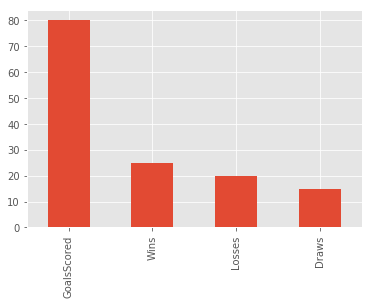

In [77]:
plt.style.use('ggplot')
for team in teams.index:
    teams.loc[team].plot.bar()
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

ValueError: num must be 1 <= num <= 6, not 7

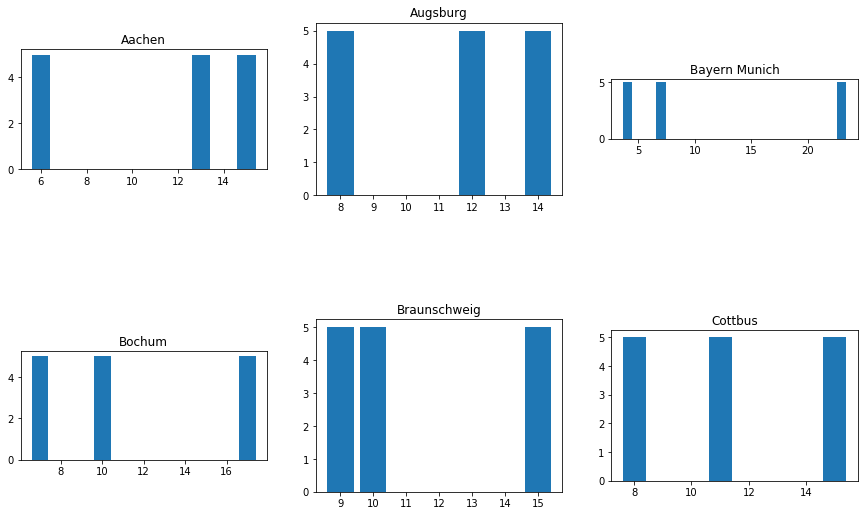

In [56]:
fig = plt.figure(figsize=(15,10))

for i, (name, row) in enumerate(teams.iloc[:,1:].iterrows()):
    ax = plt.subplot(2,3, i+1)
    ax.set_title(row.name)
    ax.set_aspect('equal')
    ax.bar(row, height = 5)

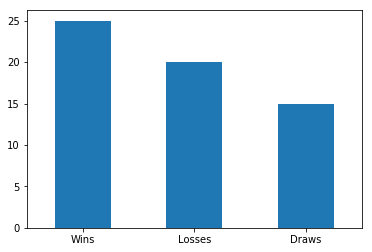

In [50]:
charts = []
for i in range(len(teams)):
    charts.append(teams.iloc[i,1:].plot.bar(rot=0))

In [47]:
charts

In [97]:
dates = [str(datetime.date(2011,7, 15) + datetime.timedelta(i)) for i in range(297)]

#time set at 3pm GMT to find 4pm European Central Time

urls = ["https://api.darksky.net/forecast/520ec0a7ffac4abd104235b232a81fbb/52.5200,13.4050,"\
                       +date+"T15:00:00Z?exclude=currently,hourly,flags" for date in dates]

#retrieve data and unstring
data = []
for i in urls:
    data.append(json.loads(requests.get(i).text))

#unnest dictionaries
daily_data = [data[i]['daily']['data'][0] for i in range(len(data))]

#extract precipitation type
precipType = []
for i in range(len(daily_data)):
    if 'precipType' in daily_data[i].keys():
        precipType.append(daily_data[i]['precipType'])
    else:
        precipType.append('0')

#Create dataframe with dates and precipitation type
weatherdf = pd.DataFrame(list(zip(dates, precipType)), 
               columns =['Date', 'Rain'])
#change strings into rain dummy variable
weatherdf['Rain']= weatherdf['Rain'].map({'0':0, 'rain':1, 'sleet':0, 'snow':0})


SyntaxError: invalid syntax (<ipython-input-97-3376e7a03a13>, line 5)

In [96]:
list(zip(dates, precipType)

['0',
 '0',
 'rain',
 'rain',
 '0',
 '0',
 'rain',
 'rain',
 'rain',
 '0',
 '0',
 '0',
 '0',
 'rain',
 'rain',
 'rain',
 'rain',
 'rain',
 'rain',
 '0',
 'rain',
 'rain',
 'rain',
 'rain',
 'rain',
 '0',
 'rain',
 'rain',
 'rain',
 '0',
 'rain',
 'rain',
 'rain',
 '0',
 '0',
 'rain',
 '0',
 '0',
 '0',
 'rain',
 'rain',
 'rain',
 'rain',
 'rain',
 '0',
 'rain',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'rain',
 '0',
 'rain',
 'rain',
 'rain',
 'rain',
 'rain',
 'rain',
 '0',
 '0',
 '0',
 '0',
 '0',
 'rain',
 'rain',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'rain',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'rain',
 'rain',
 'rain',
 'rain',
 '0',
 'rain',
 'rain',
 'rain',
 '0',
 '0',
 '0',
 'rain',
 '0',
 'rain',
 'rain',
 '0',
 '0',
 '0',
 'rain',
 '0',
 '0',
 'rain',
 'rain',
 '0',
 '0',
 'rain',
 '0',
 'rain',
 '0',
 'rain',
 '0',
 'rain',
 'rain',
 '0',
 'rain',
 'rain',
 'rain',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'rain',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'rain',
 'rain',
 

In [104]:
df = df.merge(weatherdf, on='Date', how='left')
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeWin,AwayWin,HomeLoss,AwayLoss,Rain
0,1133,D2,2011,2011-07-15,Cottbus,Dresden,2,1,H,1,0,0,1,0
1,1167,D2,2011,2011-07-15,Greuther Furth,Ein Frankfurt,2,3,A,0,1,1,0,0
2,1551,D2,2011,2011-07-15,Frankfurt FSV,Union Berlin,1,1,D,0,0,0,0,0
3,1550,D2,2011,2011-07-16,Erzgebirge Aue,Aachen,1,0,H,1,0,0,1,0
4,1678,D2,2011,2011-07-16,St Pauli,Ingolstadt,2,0,H,1,0,0,1,0


In [105]:
teams['RainGames'] = df.groupby('HomeTeam').Rain.sum() + df.groupby('AwayTeam').Rain.sum()
teams['RainWins'] = df[df.Rain==1].groupby('HomeTeam').HomeWin.sum() + df[df.Rain==1].groupby('AwayTeam').AwayWin.sum()
teams['NonRainWins'] = teams.Wins - teams.RainWins


,GoalsScored,Wins,Losses,Draws,RainGames,RainWins,NonRainWins
HomeTeam,,,,,,,
Aachen,30,6,15,13,13,3,3
Augsburg,36,8,12,14,11,4,4
Bayern Munich,77,23,7,4,11,8,15
Bochum,41,10,17,7,11,3,7
Braunschweig,37,10,9,15,9,4,6


In [106]:
teams['RainWin%'] = teams.RainWins/teams.RainGames
teams['NonRainWin%'] = teams.NonRainWins/(34-teams.RainGames)
teams['%ChangeWinWithRain'] = (teams['RainWin%']-teams['NonRainWin%'])/teams['NonRainWin%']
teams.head()

,GoalsScored,Wins,Losses,Draws,RainGames,RainWins,NonRainWins,RainWin%,NonRainWin%,%ChangeWinWithRain
HomeTeam,,,,,,,,,,
Aachen,30,6,15,13,13,3,3,0.230769,0.142857,0.615385
Augsburg,36,8,12,14,11,4,4,0.363636,0.173913,1.090909
Bayern Munich,77,23,7,4,11,8,15,0.727273,0.652174,0.115152
Bochum,41,10,17,7,11,3,7,0.272727,0.304348,-0.103896
Braunschweig,37,10,9,15,9,4,6,0.444444,0.240000,0.851852


In [107]:
teams.index.rename('Team', inplace=True)

In [108]:
teams.head()

,GoalsScored,Wins,Losses,Draws,RainGames,RainWins,NonRainWins,RainWin%,NonRainWin%,%ChangeWinWithRain
Team,,,,,,,,,,
Aachen,30,6,15,13,13,3,3,0.230769,0.142857,0.615385
Augsburg,36,8,12,14,11,4,4,0.363636,0.173913,1.090909
Bayern Munich,77,23,7,4,11,8,15,0.727273,0.652174,0.115152
Bochum,41,10,17,7,11,3,7,0.272727,0.304348,-0.103896
Braunschweig,37,10,9,15,9,4,6,0.444444,0.240000,0.851852


In [5]:
parse('2011/12/12')

datetime.datetime(2011, 12, 12, 0, 0)

In [44]:
df.head()

NameError: name 'df' is not defined

In [ ]:
def __init__(self, season_start_date, season_end_date):
        self.start_date = parse(season_start_date)
        self.end_date = parse(season_end_date)
        self.date_range = (parse(season_end_date) - parse(season_start_date)).days
        self.dates = [str(self.start_date + datetime.timedelta(i)).split()[0] for i in range(self.date_range)]

In [81]:
dates[1]

'1999-07-13'

In [80]:
season_start_date = '1999/7/12'
season_end_date = '2001/8/12'
time_24hours = '16:00'
timezone = 'Europe/London'

start_date = parse(season_start_date)
end_date = parse(season_end_date)
date_range = (parse(season_end_date) - parse(season_start_date)).days
dates = [str(start_date + datetime.timedelta(i)).split()[0] for i in range(date_range)]
offsets = [pytz.timezone(timezone).localize(parse(i)).strftime('%z') for i in dates]
times = ['T' + time + ':00' + offset[:3] + ':' + offset[3:] for offset in offsets]
datetimes = [dates[i] + times[i] for date in dates]
datetimes
# location = location

['2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-11T15:00:00+01:00',
 '2000-07-

In [69]:
dates

['1999-07-12',
 '1999-07-13',
 '1999-07-14',
 '1999-07-15',
 '1999-07-16',
 '1999-07-17',
 '1999-07-18',
 '1999-07-19',
 '1999-07-20',
 '1999-07-21',
 '1999-07-22',
 '1999-07-23',
 '1999-07-24',
 '1999-07-25',
 '1999-07-26',
 '1999-07-27',
 '1999-07-28',
 '1999-07-29',
 '1999-07-30',
 '1999-07-31',
 '1999-08-01',
 '1999-08-02',
 '1999-08-03',
 '1999-08-04',
 '1999-08-05',
 '1999-08-06',
 '1999-08-07',
 '1999-08-08',
 '1999-08-09',
 '1999-08-10',
 '1999-08-11',
 '1999-08-12',
 '1999-08-13',
 '1999-08-14',
 '1999-08-15',
 '1999-08-16',
 '1999-08-17',
 '1999-08-18',
 '1999-08-19',
 '1999-08-20',
 '1999-08-21',
 '1999-08-22',
 '1999-08-23',
 '1999-08-24',
 '1999-08-25',
 '1999-08-26',
 '1999-08-27',
 '1999-08-28',
 '1999-08-29',
 '1999-08-30',
 '1999-08-31',
 '1999-09-01',
 '1999-09-02',
 '1999-09-03',
 '1999-09-04',
 '1999-09-05',
 '1999-09-06',
 '1999-09-07',
 '1999-09-08',
 '1999-09-09',
 '1999-09-10',
 '1999-09-11',
 '1999-09-12',
 '1999-09-13',
 '1999-09-14',
 '1999-09-15',
 '1999-09-

In [77]:
offsets = [pytz.timezone('Asia/Tokyo').localize(parse(i)).strftime('%z') for i in dates]
times = ['T' + time + ':00' + offset[:3] + ':' + offset[3:] for offset in offsets]


['T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',
 'T15:00:00+09:00',


In [ ]:
times = ['T' + time + ':00' + str(pytz.timezone(timezone).localize(datetime(date)).strftime('%z')[:3])\
        + ':' + str(pytz.timezone(timezone).localize(datetime(date)).strftime('%z')[3:])\
       for date in dates]